## Matplotlib 한글폰트 사용하기

### 1. 필요한 패키지를 가져온다

In [2]:
#그래프를 노트북안에 그리기 위함
%matplotlib inline

# 패키지
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

#그래프에서 마이너스폰트 깨지는 문제 대처
mpl.rcParams['axes.unicode_minus'] = False

### 2. 그래프를 그리기 위해 임의의 데이터를 만들어준다

In [4]:
import numpy as np

data = np.random.randint(-100,100,50).cumsum()
data

array([ -13,  -18,   17,   20,   58,   64,   60,   35,   68,  131,   39,
        -17,  -68,    8,  -90,  -40,   54,   74,   55,   82,  -12,  -50,
        -96, -115, -151, -182, -125,  -78,  -13,  -56,   38,    6,  -82,
       -145, -147, -134, -101, -170, -241, -244, -207, -270, -297, -221,
       -177, -193, -164, -205, -231, -152], dtype=int32)

### 3. 기본 폰트로 지정되었기 때문에 한글이 깨져서 나온다

Text(0.5, 0, '시간(분)')

findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.
C:\ProgramData\Anaconda3\envs\python3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\envs\python3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44036 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\envs\python3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 48324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\envs\python3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\envs\python3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44201 missing from current font.
  font.set_text(s, 

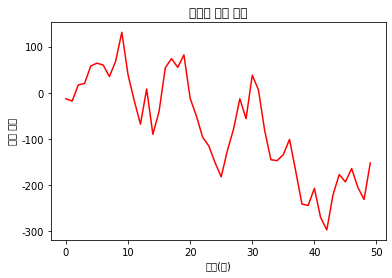

In [5]:
plt.plot(range(50), data, 'r')
mpl.rcParams['axes.unicode_minus']  = False
plt.title('시간별 가격 추이')
plt.ylabel('주식 가격')
plt.xlabel('시간(분)')

### 4. 폰트를 설정하기 앞서 설치된 matplotlib의 버전과 위치정보 가져오기

In [5]:
print('버전 : ',mpl.__version__)
print('설치 위치 : ',mpl.__file__)
print('설정 위치 : ',mpl.get_configdir())
print('캐시 위치 : ',mpl.get_cachedir())

버전 :  3.1.3
설치 위치 :  C:\ProgramData\Anaconda3\envs\python3\lib\site-packages\matplotlib\__init__.py
설정 위치 :  C:\Users\multicampus\.matplotlib
캐시 위치 :  C:\Users\multicampus\.matplotlib


### 5. matplotlib의 위치를 터미널로 가보기

In [6]:
print('설정 파일 위치 : ',mpl.matplotlib_fname())

설정 파일 위치 :  C:\ProgramData\Anaconda3\envs\python3\lib\site-packages\matplotlib\mpl-data\matplotlibrc


### 6. 설치된 폰트 찍어보기

In [7]:
font_list = fm.findSystemFonts(fontpaths=None, fontext='ttf')

# ttf 폰트 전체갯수
print(len(font_list))

360


In [8]:
#os의 설치된 폰트를 가져오는 함수
font_list_win = fm.OSXInstalledFonts()
print(len(font_list_win))

0


C:\ProgramData\Anaconda3\envs\python3\lib\site-packages\ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The OSXInstalledFonts function was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  


In [18]:
font_list[:10]

['C:\\Windows\\Fonts\\LFAXDI.TTF',
 'C:\\Windows\\Fonts\\CENSCBK.TTF',
 'C:\\Windows\\Fonts\\corbeli.ttf',
 'C:\\Windows\\Fonts\\H2GTRM.TTF',
 'C:\\Windows\\Fonts\\ROCKBI.TTF',
 'C:\\Windows\\Fonts\\GOTHICI.TTF',
 'C:\\Windows\\Fonts\\CALIFI.TTF',
 'C:\\Windows\\Fonts\\YuGothL.ttc',
 'C:\\Windows\\Fonts\\timesi.ttf',
 'C:\\Windows\\Fonts\\GILSANUB.TTF']

### 7. 나눔고딕을 사용할 예정이라 이름에 'Nanum' 이 들어간 폰트만 가져온다

In [4]:
[(f.name, f.fname) for f in fm.fontManager.ttflist if 'Nanum' in f.name]

[]

### 폰트를 사용하는 방법 3가지  
 1) FontProperties를 사용하는 방법 - 그래프의 폰트가 필요한 항목마다 지정해야함  
 2) matplotlib.rcParams[]으로 전역글꼴 설정방법 - 그래프에 설정하면 폰트가 필요한 항목에 적용  
 3) 2)번의 방법을 npl.matplotlib_fname()으로 읽어지는 설정파일에 직접 적어주는 방법

#### 나는 1번밖에 안돼..

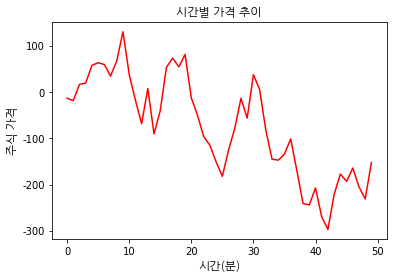

In [14]:
# 1) fname 옵션을 사용하는 방법
path = 'C:/Windows/Fonts/NanumGothic.ttf'
fontprop = fm.FontProperties(fname=path, size=12)

plt.plot(range(50), data, 'r')
plt.title('시간별 가격 추이', fontproperties=fontprop)
plt.ylabel('주식 가격', fontproperties=fontprop)
plt.xlabel('시간(분)', fontproperties=fontprop)
plt.show()

#### 참고  
(kaggle 강의 notebook)[http://corazzon.github.io/matplotlib_font_setting]  
(window anaconda matplotlib 폰트)[https://financedata.github.io/posts/matplotlib-hangul-for-windows-anaconda.html]
